# Iskalna drevesa

## Predpriprava

In [1]:
#use "topfind" ;;
#require "jupyter.notebook" ;;

- : unit = ()
Findlib has been successfully loaded. Additional directives:
  #require "package";;      to load a package
  #list;;                   to list the available packages
  #camlp4o;;                to load camlp4 (standard syntax)
  #camlp4r;;                to load camlp4 (revised syntax)
  #predicates "p,q,...";;   to set these predicates
  Topfind.reset();;         to force that packages will be reloaded
  #thread;;                 to enable threads

- : unit = ()


/Users/matija/.opam/default/lib/base64: added to search path
/Users/matija/.opam/default/lib/base64/base64.cma: loaded
/Users/matija/.opam/default/lib/ocaml/compiler-libs: added to search path
/Users/matija/.opam/default/lib/ocaml/compiler-libs/ocamlcommon.cma: loaded


/Users/matija/.opam/default/lib/seq: added to search path
/Users/matija/.opam/default/lib/yojson: added to search path
/Users/matija/.opam/default/lib/yojson/yojson.cma: loaded
/Users/matija/.opam/default/lib/ppx_yojson_conv_lib: added to search path
/Users/matija/.opam/default/lib/ppx_yojson_conv_lib/ppx_yojson_conv_lib.cma: loaded
/Users/matija/.opam/default/lib/ocaml/unix.cma: loaded
/Users/matija/.opam/default/lib/bytes: added to search path
/Users/matija/.opam/default/lib/uuidm: added to search path
/Users/matija/.opam/default/lib/uuidm/uuidm.cma: loaded
/Users/matija/.opam/default/lib/jupyter: added to search path
/Users/matija/.opam/default/lib/jupyter/jupyter.cma: loaded
/Users/matija/.opam/default/lib/result: added to search path
/Users/matija/.opam/default/lib/result/result.cma: loaded
/Users/matija/.opam/default/lib/ppx_deriving/runtime: added to search path
/Users/matija/.opam/default/lib/ppx_deriving/runtime/ppx_deriving_runtime.cma: loaded
/Users/matija/.opam/default/lib/

In [2]:
type 'a drevo = Prazno | Sestavljeno of 'a drevo * 'a * 'a drevo

type 'a drevo = Prazno | Sestavljeno of 'a drevo * 'a * 'a drevo


In [3]:
let to_dot oznaka_vozlisca drevo =
  let stevec = ref 0 in
  let rec aux stars =
    function
    | Prazno -> ""
    | Sestavljeno (levo, koren, desno) ->
        let id = !stevec in
        incr stevec;
        let oznaka = 
          Printf.sprintf "%d [label=\"%s\"];\n" id (oznaka_vozlisca koren)
        in
        let povezava =
          match stars with
          | None -> "";
          | Some id' -> Printf.sprintf "%d -> %d;" id' id
        in
        let levi = aux (Some id) levo
        and desni = aux (Some id) desno
        in
        oznaka ^ povezava ^ levi ^ desni
  in
  "digraph BST {\n" ^ aux None drevo ^ "}\n"

let narisi oznaka_vozlisca drevo =
  let ime_datoteke = "drevo.dot" in
  let datoteka = open_out ime_datoteke in
  let dot = to_dot oznaka_vozlisca drevo in
  Printf.fprintf datoteka "%s\n" dot;
  close_out datoteka;
  ignore (Jupyter_notebook.Process.sh "dot -Tpng drevo.dot > drevo.png");
  ignore (Jupyter_notebook.display_file ~base64:true "image/png" "drevo.png");
  drevo

val to_dot : ('a -> string) -> 'a drevo -> string = <fun>


val narisi : ('a -> string) -> 'a drevo -> 'a drevo = <fun>


In [4]:
let list x = Sestavljeno (Prazno, x, Prazno)

let primer =
  Sestavljeno (
    list 30,
    10,
    Sestavljeno (
      list 20,
      50,
      list 30
    )
  )

val list : 'a -> 'a drevo = <fun>


val primer : int drevo =
  Sestavljeno (Sestavljeno (Prazno, 30, Prazno), 10,
   Sestavljeno (Sestavljeno (Prazno, 20, Prazno), 50,
    Sestavljeno (Prazno, 30, Prazno)))


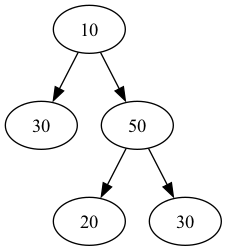

- : int drevo =
Sestavljeno (Sestavljeno (Prazno, 30, Prazno), 10,
 Sestavljeno (Sestavljeno (Prazno, 20, Prazno), 50,
  Sestavljeno (Prazno, 30, Prazno)))


In [5]:
narisi string_of_int primer

## Število različnih

In [6]:
let stevilo_razlicnih xs =
  let rec aux ze_videni = function
    | [] -> List.length ze_videni
    | x :: xs ->
        if List.mem x ze_videni
        then aux ze_videni xs
        else aux (x :: ze_videni) xs
  in
  aux [] xs

val stevilo_razlicnih : 'a list -> int = <fun>


In [7]:
let nakljucni_seznam m n = List.init n (fun _ -> Random.int m)

let seznam_zaporednih n = List.init n (fun i -> i)

let stopaj f x =
  let zacetek = Sys.time () in
  let y = f x in
  let konec = Sys.time () in
  let izpis = 
    Printf.sprintf "Porabljen čas: %f ms\n" (1000. *. (konec -. zacetek))
  in
  print_endline izpis;
  y

let _ = Random.self_init ()

val nakljucni_seznam : int -> int -> int list = <fun>


val seznam_zaporednih : int -> int list = <fun>


val stopaj : ('a -> 'b) -> 'a -> 'b = <fun>


- : unit = ()


In [8]:
stopaj stevilo_razlicnih (nakljucni_seznam 20000 20000)

Porabljen čas: 1712.308000 ms



- : int = 12635


In [9]:
stopaj stevilo_razlicnih (nakljucni_seznam 1000 10000)

Porabljen čas: 71.679000 ms



- : int = 1000


## Iskalna drevesa

### Definicija


Dvojiško drevo je **iskalno**, če:

* so vsi elementi **levega** otroka **manjši** od korena
* so vsi elementi **desnega** otroka **večji** od korena
* sta **oba** otroka tudi **iskalni** drevesi

![](../../zapiski/slike/09-iskalna-drevesa/iskalno-drevo.png)

### Iskanje


![](../../zapiski/slike/09-iskalna-drevesa/iskalno-drevo-najdi.png)


![](../../zapiski/slike/09-iskalna-drevesa/iskalno-drevo-ne-najdi.png)


In [10]:

let rec poisci x drevo =
  match drevo with
  | Prazno -> false
  | Sestavljeno (levo, y, desno) when x = y -> true
  | Sestavljeno (levo, y, desno) when x < y -> poisci x levo
  | Sestavljeno (levo, y, desno) -> poisci x desno

val poisci : 'a -> 'a drevo -> bool = <fun>


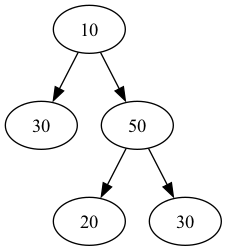

- : int drevo =
Sestavljeno (Sestavljeno (Prazno, 30, Prazno), 10,
 Sestavljeno (Sestavljeno (Prazno, 20, Prazno), 50,
  Sestavljeno (Prazno, 30, Prazno)))


In [11]:
primer |> narisi string_of_int

### Vstavljanje

In [12]:
let rec vstavi x drevo =
  match drevo with
  | Prazno -> list x
  | Sestavljeno (levo, koren, desno) ->
      if x = koren then drevo
      else if x < koren then Sestavljeno (vstavi x levo, koren, desno)
      else Sestavljeno (levo, koren, vstavi x desno)


val vstavi : 'a -> 'a drevo -> 'a drevo = <fun>



![](../../zapiski/slike/09-iskalna-drevesa/iskalno-drevo-vstavi.png)

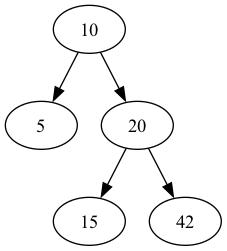

- : int drevo =
Sestavljeno (Sestavljeno (Prazno, 5, Prazno), 10,
 Sestavljeno (Sestavljeno (Prazno, 15, Prazno), 20,
  Sestavljeno (Prazno, 42, Prazno)))


In [13]:
Prazno
|> vstavi 10
|> vstavi 20
|> vstavi 5
|> vstavi 42
|> vstavi 15
|> narisi string_of_int

In [14]:
let rec stevilo_elementov =
  function
  | Prazno -> 0
  | Sestavljeno (levo, _, desno) -> 1 + stevilo_elementov levo + stevilo_elementov desno

val stevilo_elementov : 'a drevo -> int = <fun>


In [15]:
let stevilo_razlicnih xs =
  let rec aux ze_videni = function
    | [] -> stevilo_elementov ze_videni, ze_videni
    | x :: xs ->
        if poisci x ze_videni
        then aux ze_videni xs
        else aux (vstavi x ze_videni) xs
  in
  let stevilo, ze_videni = aux Prazno xs in
  ignore (narisi string_of_int ze_videni);
  stevilo

val stevilo_razlicnih : int list -> int = <fun>


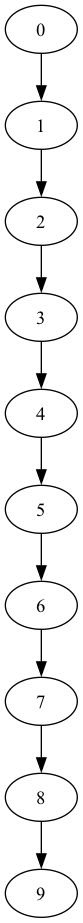

- : int = 10


In [16]:
stevilo_razlicnih (seznam_zaporednih 10)

In [17]:
let rec polno visina =
  match visina with
  | 0 -> Prazno
  | n -> Sestavljeno (polno (n - 1), 42, polno (n - 1))

val polno : int -> int drevo = <fun>


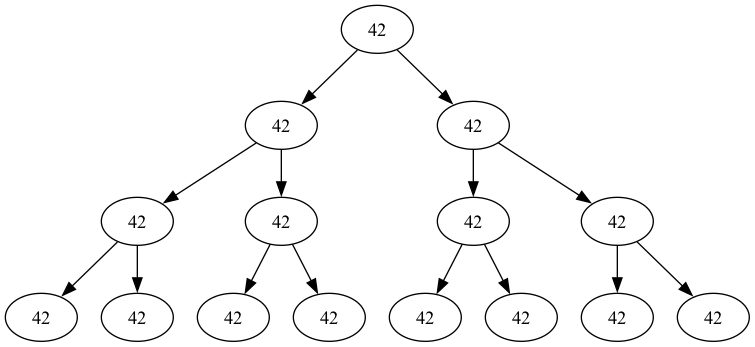

- : int drevo =
Sestavljeno
 (Sestavljeno
   (Sestavljeno (Sestavljeno (Prazno, 42, Prazno), 42,
     Sestavljeno (Prazno, 42, Prazno)),
   42,
   Sestavljeno (Sestavljeno (Prazno, 42, Prazno), 42,
    Sestavljeno (Prazno, 42, Prazno))),
 42,
 Sestavljeno
  (Sestavljeno (Sestavljeno (Prazno, 42, Prazno), 42,
    Sestavljeno (Prazno, 42, Prazno)),
  42,
  Sestavljeno (Sestavljeno (Prazno, 42, Prazno), 42,
   Sestavljeno (Prazno, 42, Prazno))))


In [18]:
polno 4 |> narisi string_of_int

### Brisanje

![](../../zapiski/slike/09-iskalna-drevesa/iskalno-drevo-brisi-list.png)

![](../../zapiski/slike/09-iskalna-drevesa/iskalno-drevo-brisi-koren.png)

![](../../zapiski/slike/09-iskalna-drevesa/iskalno-drevo-zamenjaj-koren-s-predhodnikom.png)

![](../../zapiski/slike/09-iskalna-drevesa/iskalno-drevo-zamenjaj-koren-z-naslednikom.png)

## AVL drevesa

### Definicija

Iskalno drevo je **AVL drevo**, če:

* je **razlika višin** otrok **največ 1**
* sta **oba** otroka tudi **AVL** drevesi

![](../../zapiski/slike/09-iskalna-drevesa/avl-drevo.png)


In [19]:
let rec visina drevo =
  match drevo with
  | Prazno -> 0
  | Sestavljeno (levo, _, desno) -> 1 + max (visina levo) (visina desno)
  
let razlika = function
    | Prazno -> 0
    | Sestavljeno (l, _, d) -> visina l - visina d  

val visina : 'a drevo -> int = <fun>


val razlika : 'a drevo -> int = <fun>


### Število vozlišč v AVL drevesih

$$ N(h) = \text{najmanjše število vozlišč v AVL drevesu višine $h$} $$

$$N(0) = 0$$

$$N(1) = 1$$

$$N(h) = 1 + N(h - 1) + N(h - 2)$$

$$ N(h) \ge F_h$$

$$N(h) = 1 + N(h - 1) + N(h - 2) \ge 1 + F_{h - 1} + F_{h - 2} = 1 + F_{h} > F_{h}$$

### Vstavljanje v AVL drevo

![](../../zapiski/slike/09-iskalna-drevesa/dodajanje-pokvari-avl-drevo.png)

![](../../zapiski/slike/09-iskalna-drevesa/brisanje-pokvari-avl-drevo.png)

### Možne neuravnoteženosti

![](../../zapiski/slike/09-iskalna-drevesa/mozni-neuravnotezenosti.png)

Brez škode za splošnost poglejmo drugo:

![](../../zapiski/slike/09-iskalna-drevesa/mozni-desni-neuravnotezenosti.png)

Pri prvi uporabimo levo rotacijo:

![](../../zapiski/slike/09-iskalna-drevesa/leva-rotacija.png)

In [20]:
let zavrti_levo = function
| Sestavljeno (l, x, Sestavljeno (dl, y, dd)) ->
    Sestavljeno (Sestavljeno (l, x, dl), y, dd)
| _ -> failwith "Tega drevesa ne morem zavrteti"


val zavrti_levo : 'a drevo -> 'a drevo = <fun>


Pri drugi uporabimo desno-levo rotacijo:

![](../../zapiski/slike/09-iskalna-drevesa/desna-rotacija.png)

In [21]:
let zavrti_desno = function
| Sestavljeno (Sestavljeno (ll, y, ld), x, d) ->
    Sestavljeno (ll, y, Sestavljeno (ld, x, d))
| _ -> failwith "Tega drevesa ne morem zavrteti"

let uravnotezi drevo =
match drevo with
| Sestavljeno (l, x, d) when razlika drevo = 2 && razlika l = 1 ->
    zavrti_desno drevo
| Sestavljeno (l, x, d) when razlika drevo = 2 ->
    Sestavljeno (zavrti_levo l, x, d) |> zavrti_desno
| Sestavljeno (l, x, d) when razlika drevo = -2 && razlika d = -1 ->
    zavrti_levo drevo
| Sestavljeno (l, x, d) when razlika drevo = -2 ->
    Sestavljeno (l, x, zavrti_desno d) |> zavrti_levo
| _ -> drevo

val zavrti_desno : 'a drevo -> 'a drevo = <fun>


val uravnotezi : 'a drevo -> 'a drevo = <fun>


In [22]:
let rec vstavi x drevo =
  match drevo with
  | Prazno -> list x
  | Sestavljeno (levo, koren, desno) ->
      if x = koren then drevo
      else if x < koren then Sestavljeno (vstavi x levo, koren, desno) |> uravnotezi
      else Sestavljeno (levo, koren, vstavi x desno) |> uravnotezi


val vstavi : 'a -> 'a drevo -> 'a drevo = <fun>


In [23]:
let rec stevilo_elementov =
  function
  | Prazno -> 0
  | Sestavljeno (levo, _, desno) -> 1 + stevilo_elementov levo + stevilo_elementov desno

val stevilo_elementov : 'a drevo -> int = <fun>


In [24]:
let stevilo_razlicnih xs =
  let rec aux ze_videni = function
    | [] -> stevilo_elementov ze_videni, ze_videni
    | x :: xs ->
        if poisci x ze_videni
        then aux ze_videni xs
        else aux (vstavi x ze_videni) xs
  in
  let stevilo, ze_videni = aux Prazno xs in
  stevilo

val stevilo_razlicnih : 'a list -> int = <fun>


In [25]:
stevilo_razlicnih (seznam_zaporednih 20000)

- : int = 20000
